# Goal

The goal of this notebook is to perform automatic segmentation.

- get only the brain
- perform automatic segmentation

Realized that this is extremely difficult so changing tactics and I am going to do it for each slice.

# Background

- [DB](http://www.chimpanzeebrain.org/mri-datasets-for-direct-download)
- [Simple ITK Image Basics](http://simpleitk.github.io/SimpleITK-Notebooks/01_Image_Basics.html)

I will try to following these VTK and ITK tutorials:
- [Image Segmentation with Python and SimpleITK](https://pyscience.wordpress.com/2014/10/19/image-segmentation-with-python-and-simpleitk/)
    - [Jupyter notebook](http://nbviewer.jupyter.org/urls/bitbucket.org/somada141/pyscience/raw/master/20141001_SegmentationSimpleITK/Material/SegmentationSimpleITK.ipynb)
    
Articles to read:
- [MRI Segmentation of the Human Brain: Challenges, Methods, and Applications](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4402572/)
- [Automatic Segmentation of Newborn Brain MRI](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2945911/)
- [Methods on Skull Stripping of MRI Head Scan Images—a Review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4879034/)

# Imports

In [1]:
import os
import numpy
import SimpleITK
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
import scipy.ndimage

# Functions

In [2]:
def sitk_show(img, title=None, margin=0.05, dpi=40 ):
    nda = SimpleITK.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=None)
    
    if title:
        plt.title(title)
    
    plt.show()

In [3]:
def showSegmentation(sliceNum=90):
    # Get slice
    idxSlice = sliceNum
    imgOriginal = image[:,:,idxSlice]

    # Apply smoothing
    imgSmooth = SimpleITK.CurvatureFlow(image1=imgOriginal,
                                        timeStep=0.125,
                                        numberOfIterations=5)
    sitk_show(imgSmooth)

    # Get segmentation
    lstSeeds = [(75,60)]

    imgWhiteMatter = SimpleITK.ConnectedThreshold(image1=imgSmooth, 
                                                  seedList=lstSeeds, 
                                                  lower=0, 
                                                  upper=40,
                                                  replaceValue=labelWhiteMatter)

    # Rescale 'imgSmooth' and cast it to an integer type to match that of 'imgWhiteMatter'
    imgSmoothInt = SimpleITK.Cast(SimpleITK.RescaleIntensity(imgSmooth), imgWhiteMatter.GetPixelID())

    # Use 'LabelOverlay' to overlay 'imgSmooth' and 'imgWhiteMatter'
    sitk_show(SimpleITK.LabelOverlay(imgSmoothInt, imgWhiteMatter))

    # show segmentation
    sitk_show(imgWhiteMatter)

# Parameters

In [4]:
inpath = 'C://Cerebral//_MarioSandBox//DB//medicalHolography//Monkey//10 sample Chimpanzee 3T for NCBR website//Male_Fritz.nii'
# inpath = "C://Cerebral//_MarioSandBox//DB//medicalHolography//UofT Mouse Brain//C57brain.mnc"

In [5]:
# Z slice of the DICOM files to process. In the interest of
# simplicity, segmentation will be limited to a single 2D
# image but all processes are entirely applicable to the 3D image
idxSlice = 50

# int labels to assign to the segmented white and gray matter.
# These need to be different integers but their values themselves
# don't matter
labelWhiteMatter = 1
labelGrayMatter = 2

# Reading Data

In [6]:
reader = SimpleITK.ImageFileReader()
image = SimpleITK.ReadImage(inpath)

# Display the data

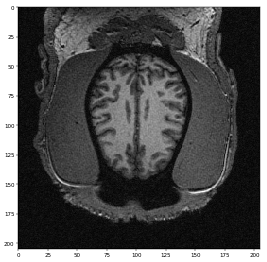

In [7]:
idxSlice = 50
imgOriginal = image[:,:,idxSlice]
sitk_show(imgOriginal)

# Smoothing

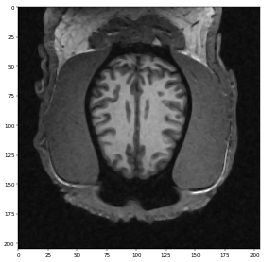

In [8]:
imgSmooth = SimpleITK.CurvatureFlow(image1=imgOriginal,
                                    timeStep=0.125,
                                    numberOfIterations=5)

# blurFilter = SimpleITK.CurvatureFlowImageFilter()
# blurFilter.SetNumberOfIterations(5)
# blurFilter.SetTimeStep(0.125)
# imgSmooth = blurFilter.Execute(imgOriginal)

sitk_show(imgSmooth)

We are basically just smoothing the images so that it doesn't have that grainy look to it.

# Segmentation with the CoonectedThreshold filter

This is just a test 

In [65]:
# Get slice
idxSlice = 32
imgOriginal = image[:,:,idxSlice]
imgSmooth = SimpleITK.CurvatureFlow(image1=imgOriginal,
                                    timeStep=0.125,
                                    numberOfIterations=5)
sliceImage = SimpleITK.GetArrayFromImage(imgSmooth) 

# Get Mask
fileLocation = 'C://Cerebral//_MarioSandBox//DB//medicalHolography//Animal Brains//Monkey//JPG Stacks Masks - MyModifications//'
fileName = '{}.jpg'.format(idxSlice)
img = scipy.ndimage.imread(fileLocation+fileName)
mask = img[:,:,0]

# Apply Mask
maskedImage = sliceImage*mask


C:\Users\HP\Anaconda2\envs\py27\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  if sys.path[0] == '':


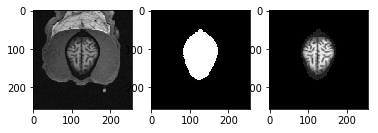

In [66]:
plt.subplot(1,3,1)
plt.imshow(sliceImage)
plt.subplot(1,3,2)
plt.imshow(mask)
plt.subplot(1,3,3)
plt.imshow(maskedImage)

## Gray Matter Segmentation

Note that I am merely guessing the lower and upper bounds of the thresholding. 

In this case I am guessing them to be between 90-200 starting with the seed at pt.[90,90]

In [ ]:
lstSeeds = [(90,90)]

imgWhiteMatter = SimpleITK.ConnectedThreshold(image1=imgSmooth, 
                                              seedList=lstSeeds, 
                                              lower=90, 
                                              upper=200,
                                              replaceValue=labelWhiteMatter)

# Rescale 'imgSmooth' and cast it to an integer type to match that of 'imgWhiteMatter'
imgSmoothInt = SimpleITK.Cast(SimpleITK.RescaleIntensity(imgSmooth), imgWhiteMatter.GetPixelID())

# Use 'LabelOverlay' to overlay 'imgSmooth' and 'imgWhiteMatter'
sitk_show(SimpleITK.LabelOverlay(imgSmoothInt, imgWhiteMatter))

In [ ]:
imgWhiteMatterNoHoles = SimpleITK.VotingBinaryHoleFilling(image1=imgWhiteMatter,
                                                          radius=[2]*3,
                                                          majorityThreshold=1,
                                                          backgroundValue=0,
                                                          foregroundValue=labelWhiteMatter)

sitk_show(SimpleITK.LabelOverlay(imgSmoothInt, imgWhiteMatterNoHoles))

## White Matter Segmentation

Note that I am merely guessing the lower and upper bounds of the thresholding. 

In this case I am guessing them to be between 40-90 starting with the seed at pt.[80,90]

In [ ]:
lstSeeds = [(80,90)]

imgGrayMatter = SimpleITK.ConnectedThreshold(image1=imgSmooth, 
                                             seedList=lstSeeds, 
                                             lower=40, 
                                             upper=90,
                                             replaceValue=labelGrayMatter)

imgGrayMatterNoHoles = SimpleITK.VotingBinaryHoleFilling(image1=imgGrayMatter,
                                                         radius=[2]*3,
                                                         majorityThreshold=1,
                                                         backgroundValue=0,
                                                         foregroundValue=labelGrayMatter)

sitk_show(SimpleITK.LabelOverlay(imgSmoothInt, imgGrayMatterNoHoles))

## Overlay

In [ ]:
imgLabels = imgWhiteMatterNoHoles | imgGrayMatterNoHoles


sitk_show(SimpleITK.LabelOverlay(imgSmoothInt, imgLabels))